In [ ]:
import numpy as np
from numpy import cos, sin
import random
from scipy import signal
import math
import matplotlib.pyplot as plt

In [ ]:
# Зададим зашумленный и незашумленный сигнал
dt = 0.001
time = np.linspace(-7, 7, int(1/dt))
y = lambda t: sin(t)
a = .1
y_noised = lambda t: sin(t) + a * (random.uniform(0, 1) - 0.5)
Y = [y(t) for t in time]
Y_noised = [y_noised(t) for t in time]

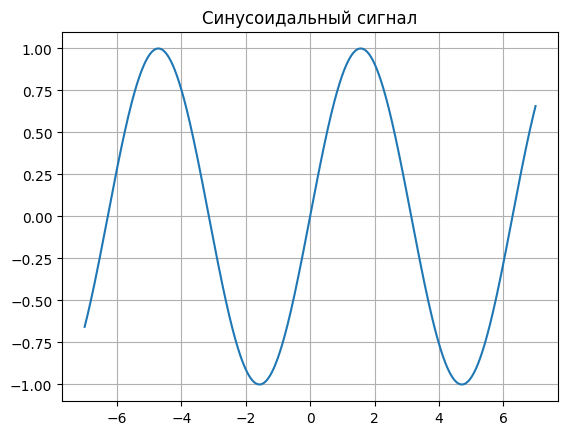

In [ ]:
fig, ax = plt.subplots()
ax.plot(time, Y)
plt.title('Синусоидальный сигнал')
plt.grid(True)

None

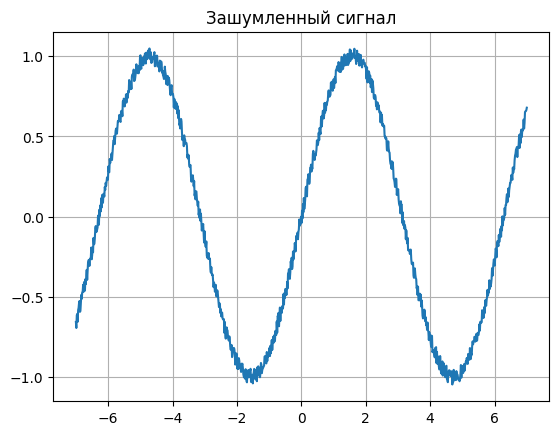

In [ ]:
fig, ax = plt.subplots()
ax.plot(time, Y_noised)
plt.grid(True)
plt.title('Зашумленный сигнал')
None

In [ ]:
def calc_num_derivative(yt, dt):
    num_derivative = [(yt[k + 1] - yt[k]) / dt for k in range(len(yt) - 1)]
    num_derivative.append((yt[-1] - yt[-2])/dt)
    return num_derivative

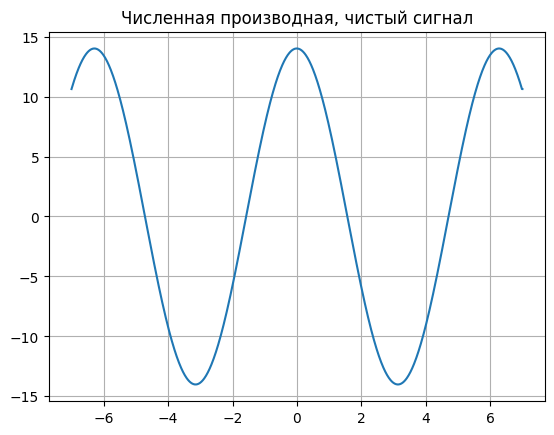

In [ ]:
Y_derivative = calc_num_derivative(Y , dt)

fig, ax = plt.subplots()
ax.plot(time, Y_derivative)
plt.grid(True)
plt.title('Численная производная, чистый сигнал')
None

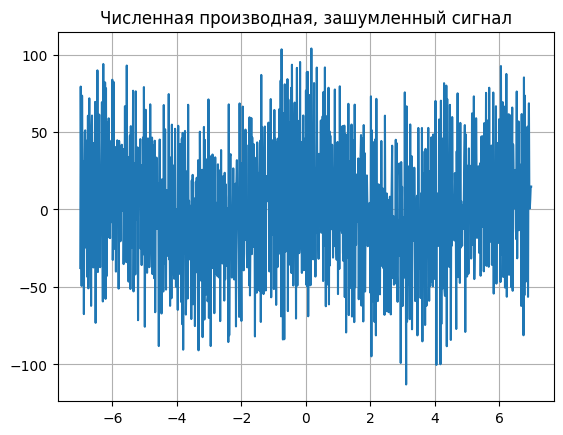

In [ ]:
Y_noised_derivative = calc_num_derivative(Y_noised , dt)

fig, ax = plt.subplots()
ax.plot(time, Y_noised_derivative)
plt.grid(True)
plt.title('Численная производная, зашумленный сигнал')
None

In [ ]:
def trapz_ft(function, time):
    def integrand(nu):
        integral = lambda t: function(t) * np.exp(-2j * np.pi * nu * t)
        temp = [integral(i) for i in time]
        return np.trapz(temp, time)
    return lambda t: integrand(t)


def trapz_ft_derivative(function, time):
    def integrand(nu):
        integral = lambda t: function(t) * np.exp(-2j * np.pi * nu * t) * 2j * np.pi * nu
        temp = [integral(i) for i in time]
        return np.trapz(temp, time)
    return lambda t: integrand(t)


def trapz_inverse_ft(ft_function, time):
    def integrand(t):
        integral = lambda nu: ft_function(nu) * np.exp(2j * np.pi * nu * t)
        temp = [integral(i) for i in time]
        return np.trapz(temp, time)
    return lambda t: integrand(t)


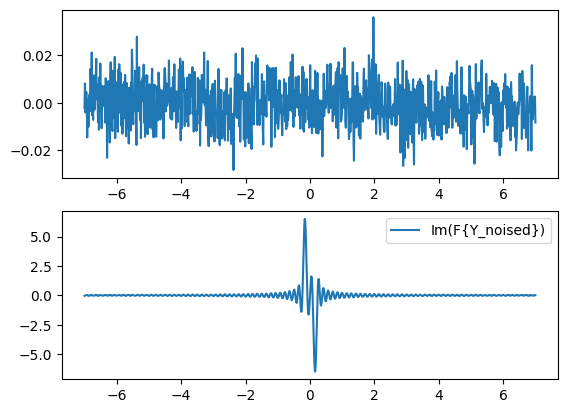

In [ ]:
ft_Y_noised = trapz_ft(y_noised, time)
fig, ax = plt.subplots(2, 1)

ax[0].plot(time, [np.real(ft_Y_noised(t)) for t in time], label='Re(F{Y_noised})')
# plt.legend()
ax[1].plot(time, [np.imag(ft_Y_noised(t)) for t in time], label='Im(F{Y_noised})')

plt.legend()

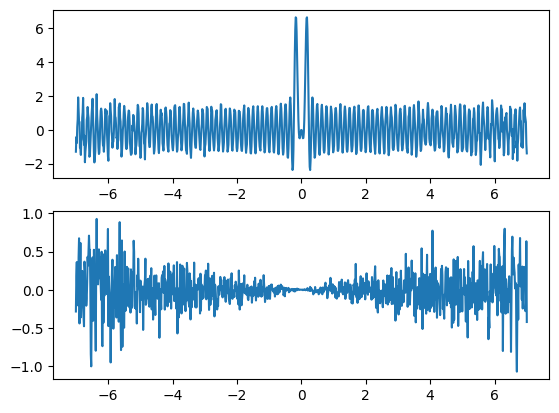

In [ ]:
fig, ax = plt.subplots(2, 1)
ft_Y_noised_derivative = trapz_ft_derivative(y_noised, time)
ax[0].plot(time, [np.real(ft_Y_noised_derivative(t)) for t in time], label = 'Re(F{Y_noised_derivative})')
ax[1].plot(time, [np.imag(ft_Y_noised_derivative(t)) for t in time], label = 'Im(F{Y_noised_derivative})')

In [ ]:
ift_Y_noised_derivative = trapz_inverse_ft(ft_Y_noised_derivative, time)

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


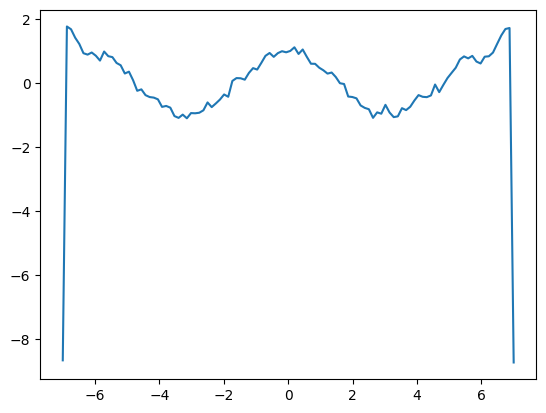

In [ ]:

small_dt = 0.1
short_time = np.linspace(-7, 7, 110)
fig, ax = plt.subplots()
ax.plot(short_time, [ift_Y_noised_derivative(t) for t in short_time])
plt.show()

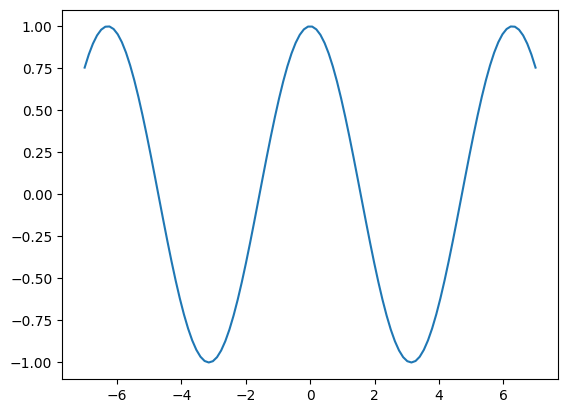

In [ ]:
fig, ax = plt.subplots()
ax.plot(short_time, [cos(t) for t in short_time])